# PageRank
Today we will implement PageRank algorithm for a small collection of document about Information Retrieval. For this we will extract link information from Wikipedia and build a Google Matrix. 

Based on the matrix you will build a *reputation ranking for the documents*.

<!-- To obtain ranking result you can use:
- Naïve approach with matrix inversion
- Power Method
 -->
# Download a dataset

**You can use this code to reproduce the whole pipeline on your machine**. 
BUT, Below you will find the code, which loads the prepared adjacency matrix from the string.

In [ ]:
!pip install wikipedia

In [2]:
import wikipedia

pages = [
    "Bag-of-words model",
    "Bayes' theorem",
    "Cluster analysis",
    "Content-based image retrieval",
    "Database",
    "Deep learning",
    "Desktop search",
    "Dimensionality reduction",
    "Discounted Cumulative Gain",
    "Eigenvector",
    "Full-text search",
    "Hypertext",
    "Image retrieval",
    "Information_retrieval",
    "Information system",
    "K-nearest neighbors algorithm",
    "Language model",
    "Latent Dirichlet allocation",
    "Latent semantic analysis",
    "Low-rank approximation",
    "Multimedia information retrieval",
    "Netflix Prize",
    "Netflix",
    "Ranking (information retrieval)",
    "Recommender systems",
    "Relevance (information retrieval)",
    "Rocchio algorithm",
    "Search algorithm",
    "Search engines",
    "Semantic search",
    "Semantic web",
    "Sentiment analysis",
    "Similarity search",
    "Search engine (computing)",  # was "Site search before"
    "Text mining",
    "Text Retrieval Conference",
    "Tf–idf",
    "Vector space model",
    "Web crawler",
    "World Wide Web"
]

import tqdm

dataset = {}
for page in tqdm.tqdm(pages):
    dataset[page] = wikipedia.page(page, auto_suggest=False)

100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


## Essential data is stored in adjacency matrix

Here we create a 0/1 adjacency matrix.

100%|██████████| 40/40 [00:26<00:00,  1.52it/s]


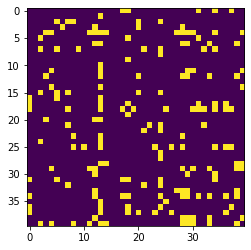

In [3]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt

A = np.zeros((len(pages), len(pages)))
for j, page in enumerate(tqdm.tqdm(pages)):
    for link in dataset[page].links:
        if link in pages:
            i = pages.index(link)
            A[i, j] = 1

plt.imshow(A)
plt.show()

In [4]:
def save(mx):
    return "".join("0" if v == 0 else "1" for v in mx.flatten())
    
Atext = save(A)
print(Atext)

0000000000000000011000000000000100100100000000000000010000000000000000000000000000000101100000000000100010000000000000000000001000001000000010000000100000000000000110000001111000000000000111100010000100100000000000000010000000000001000000000000000000001100000000000000110001000010001001000100000000000100100000001010000000000000000000000000000010000000000000000000000000000000001000000000000000000000000000000000010000000000000000000000000000001000000001000000000000000110000000010001000000000100000010000000110001000010000000000000000000000000000000000000000000001000000001000000000000000000000000010010010100000000000010001000000000000000100001000000010000000000000000000000000010000000000001000010000000000001001010001000000100000100010100000100001110101100000000000000000000100000000000000000000000010000000011000000000000000000000000000000000100000000000000101000000010000000000000000000000000000100100000000000000000000000100001000000000000001000000000000010000000000100000000000000000000000000

# ... OR You may start the lab from this place
Use the code below in your solution to load the adjacency matrix.

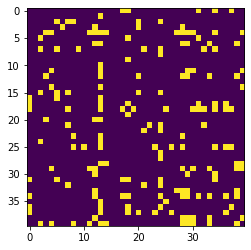

In [5]:
pages = [ "Bag-of-words model", "Bayes' theorem", "Cluster analysis", "Content-based image retrieval", "Database", "Deep learning", "Desktop search", "Dimensionality reduction", "Discounted Cumulative Gain", "Eigenvector", "Full-text search", "Hypertext", "Image retrieval", "Information retrieval", "Information system", "K-nearest neighbors algorithm", "Language model", "Latent Dirichlet allocation", "Latent semantic analysis", "Low-rank approximation", "Multimedia information retrieval", "Netflix Prize", "Netflix", "Ranking (information retrieval)", "Recommender systems", "Relevance (information retrieval)", "Rocchio algorithm", "Search algorithm", "Search engines", "Semantic search", "Semantic web", "Sentiment analysis", "Similarity search", "Site search", "Text mining", "Text Retrieval Conference", "Tf–idf", "Vector space model", "Web crawler", "World Wide Web"]
Atext = "0000000000000000011000000000000100100100000000000000010000000000000000000000000000000101100000000000100010000000000000000000001000001000000010000000100000000000000110000001111000000000000111100010000100100000000000000010000000000001000000000000000000001100000000000000110001000010001001000100000000000100100000001010000000000000000000000000000010000000000000000000000000000000001000000000000000000000000000000000010000000000000000000000000000001000000001000000000000000110000000010001000000000100000010000000110001000010000000000000000000000000000000000000000000001000000001000000000000000000000000010010010100000000000010001000000000000000100001000000010000000000000000000000000010000000000001000010000000000001001010001000000100000100010100000100001110101100000000000000000000100000000000000000000000010000000011000000000000000000000000000000000100000000000000101000000010000000000000000000000000000100100000000000000000000000100001000000000000001000000000000010000000000100000000000000000000000000000000001010010000000001001010000010110000000000000000000000000010000000000000000000000000000000000000001000000000000000000000000000011000000000000000000000001100001000000110000000000000001010010000110000000000001000000000000000010000100000100001000000000001100000100000000010000000000001000000000000010010000000000000000000000000001000000000000001110000000010100000000000100001100000100011010100101000000000000001000000000001000000000000001000000000000100001000001000000000000100100000000000010000101001001000000000100000000000000010000000000000001110010000010010100010010110000000000000111001000010"

def load(text, w=40):
    return np.array([float(a) for a in text]).reshape((w, -1))

A = load(Atext)

plt.imshow(A)
plt.show()

## Prepare a stochastic matrix M based on adjacency matrix A

Write the code which norms matrix A column-wise. Add $\frac{1}{N}$ factor where outdegree is 0.

You can refer to wikipedia's [Google Matrix](https://en.wikipedia.org/wiki/Google_matrix#Adjacency_matrix_A_and_Markov_matrix_S) article. In construction algorthm this matrix is referred as `Markov matrix S`.

In [6]:
M = A.copy()

# your code is here. Resulting matrix is shown below.

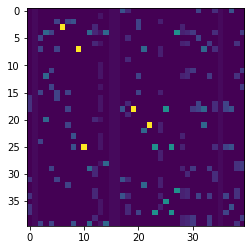

In [7]:
plt.imshow(M)
plt.show()

## Prepare the Google matrix

Compute the Google matrix as described in construction block of [Google Matrix](https://en.wikipedia.org/wiki/Google_matrix#Construction_of_Google_matrix_G) article. 

`S` there is our matrix $\mathcal{M}$.

$\alpha$ is a damping factor, which is accepted to be exactly `0.85`.

In [8]:
def to_google(M, alpha=0.85):
    # your code here
    pass

In [9]:
G = to_google(M)

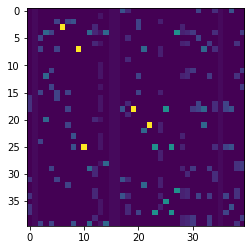

In [10]:
plt.imshow(G)
plt.show()

## Solve naively

Everything is ready for solution! Obvious way -- is to use algeraic solution of the equation.

$\mathbf{R} = d \mathcal{M}\mathbf{R} + \frac{1-d}{N} \mathbb{1}$

Remember the hack from the lecture, that:

$\mathbb{E}\times \mathbf{R}=\mathbb{1}$

In [ ]:
# your code here
R = ...
print(np.argsort(R.reshape(-1)))

## Solve with power method

You can also use [Power method](https://en.wikipedia.org/wiki/Power_iteration) to obtain dominating eigenvector.

$R = G^{N}v_{random}$

In [ ]:
# your code here
R = ...

assert np.allclose(v, R)
print(np.argsort(v.reshape(-1)))

## Built-in check

This code below allows you to check your solution, but we do not accept it as a solution.

In [ ]:
evals, evecs = np.linalg.eig(G)
print(np.argsort(evecs[:, 0]))

# Ranking

Print the ranking. First should come the documents with *the highest* PageRank.

In [ ]:
for k in np.argsort(-v.flatten()):
    print(k, "\t", pages[k])